### Getting Historical Data

In [11]:
import yfinance as yf

stock=input('enter a valid stock name : ')
print('This only deals with stocks listed on NSE & NASDAQ \n')
print(f'\n***************{stock}***************\n')

def convert_stock_NS(stock_name):
    NSE_STOCK=f'{stock_name}.NS'
    return NSE_STOCK

ans=input('Is your stock listed on NSE (y/n) : ')
if ans=='y':
    NSE_stock=convert_stock_NS(stock)
    stock_data=yf.download(NSE_stock,period="5y")
else :
    stock_data=yf.download(stock,period="5y")    

print(stock_data)

This only deals with stocks listed on NSE & NASDAQ 


***************aapl***************



[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-10-02   55.764999   55.895000   54.482498   54.740002   52.968838   
2019-10-03   54.607498   55.240002   53.782501   55.205002   53.418797   
2019-10-04   56.410000   56.872501   55.972500   56.752499   54.916214   
2019-10-07   56.567501   57.482498   56.459999   56.764999   54.928310   
2019-10-08   56.455002   57.014999   56.082500   56.099998   54.284817   
2019-10-09   56.757500   56.947498   56.410000   56.757500   54.921051   
2019-10-10   56.982498   57.610001   56.825001   57.522499   55.661304   
2019-10-11   58.237499   59.410000   58.077499   59.052502   57.141792   
2019-10-14   58.724998   59.532501   58.667500   58.967499   57.059547   
2019-10-15   59.097500   59.412498   58.720001   58.830002   56.926502   
2019-10-16   58.342499   58.810001   58.299999   58.592499   56.696682   
2019-10-17   58.772499   59.037498   5

### Getting Live data

In [12]:
import yfinance as yf
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
if ans=='y':
    NSE_stock=convert_stock_NS(stock)
    recent_data=yf.download(tickers=NSE_stock,period="5d",interval='60m')
else :
    recent_data=yf.download(stock,period="3mo", interval='60m')  
print(f'\n***************{stock}***************\n')

print(recent_data)

[*********************100%%**********************]  1 of 1 completed


***************aapl***************

                           Open        High         Low       Close  \
Datetime                                                              
2024-07-02 14:30:00  220.029999  220.330002  219.509995  219.619995   
2024-07-02 15:30:00  219.610001  220.380005  219.500000  220.369995   
2024-07-03 09:30:00  220.429993  221.399994  219.029999  219.380005   
2024-07-03 10:30:00  219.379898  220.729996  219.100098  220.115005   
2024-07-03 11:30:00  220.115005  221.300003  219.770004  221.300003   
2024-07-05 09:30:00  221.649994  225.440002  221.649994  225.170807   
2024-07-05 10:30:00  225.169998  225.190002  223.830002  224.720001   
2024-07-05 11:30:00  224.720001  225.419098  224.679993  225.220001   
2024-07-05 12:30:00  225.229996  225.369995  224.729996  225.350006   
2024-07-05 13:30:00  225.354996  225.639999  224.979996  225.250000   
2024-07-05 14:30:00  225.259995  225.524994  225.009995  225.419998   
2024-07-05 15:30:00  225.419907  226.449

### wrapping data & graphing

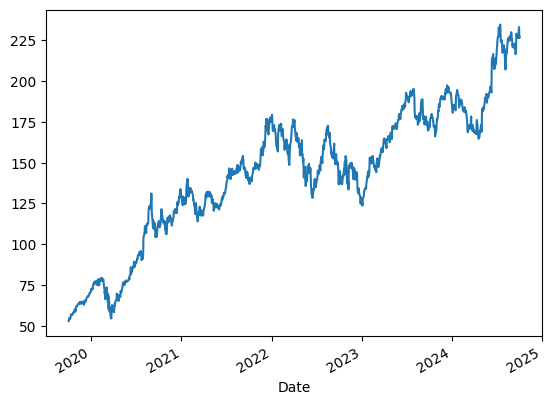

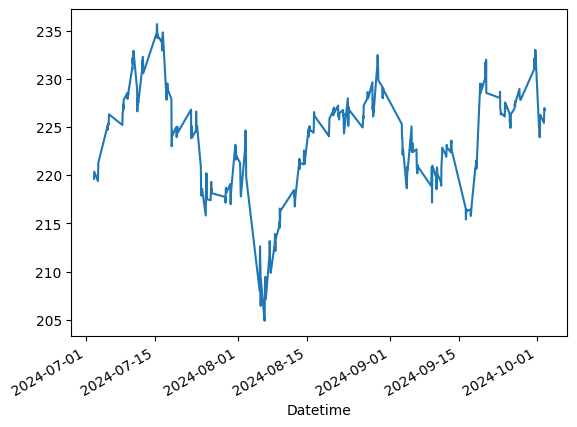

                 close
Date                  
2019-10-02   54.740002
2019-10-03   55.205002
2019-10-04   56.752499
2019-10-07   56.764999
2019-10-08   56.099998
2019-10-09   56.757500
2019-10-10   57.522499
2019-10-11   59.052502
2019-10-14   58.967499
2019-10-15   58.830002
2019-10-16   58.592499
2019-10-17   58.820000
2019-10-18   59.102501
2019-10-21   60.127499
2019-10-22   59.990002
2019-10-23   60.794998
2019-10-24   60.895000
2019-10-25   61.645000
2019-10-28   62.262501
2019-10-29   60.822498
2019-10-30   60.814999
2019-10-31   62.189999
2019-11-01   63.955002
2019-11-04   64.375000
2019-11-05   64.282501
2019-11-06   64.309998
2019-11-07   64.857498
2019-11-08   65.035004
2019-11-11   65.550003
2019-11-12   65.489998
2019-11-13   66.117500
2019-11-14   65.660004
2019-11-15   66.440002
2019-11-18   66.775002
2019-11-19   66.572502
2019-11-20   65.797501
2019-11-21   65.502502
2019-11-22   65.445000
2019-11-25   66.592499
2019-11-26   66.072502
2019-11-27   66.959999
2019-11-29 

In [13]:
# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the close price of the AAPL
stock_data['Adj Close'].plot()
plt.show()

# Plot the close price of the AAPL
recent_data['Adj Close'].plot()
plt.show()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.set_option('display.max_columns', None)
from stockstats import wrap
wrapped_data = wrap(stock_data)
wrapped_data.init_all()
#print(wrapped_data)
historical_data=wrapped_data[['close']] #,'trix','middle','vwma','high','low','volume','ppo'
print(historical_data)

### Making the data

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np


def Sequential_Input_LSTM(df, input_sequence):
    df_np = df.to_numpy()
    X = []
    y = []
    
    for i in range(len(df_np) - input_sequence):
        row = [a for a in df_np[i:i + input_sequence]]
        X.append(row)
        label = df_np[i + input_sequence]
        y.append(label)
        
    return np.array(X), np.array(y)

n_input = 10

X, y = Sequential_Input_LSTM(historical_data, n_input)

# fix random seed for reproducibility
train_X=X[:-100]
Val_X=X[-100:]
train_y=y[:-100]
val_y=y[-100:]



### Creating the Model

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 10, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 10, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151,817 (593.04 KB)

 Trainable params: 151,817 (593.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50000
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 140.0049 - root_mean_squared_error: 144.9633 - val_loss: 213.5777 - val_root_mean_squared_error: 214.5306
Epoch 2/50000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 137.6623 - root_mean_squared_error: 143.0636 - val_loss: 212.0612 - val_root_mean_squared_error: 213.0175
Epoch 3/50000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 136.5268 - root_mean_squared_error: 141.9694 - val_loss: 210.6913 - val_root_mean_squared_error: 211.6507
Epoch 4/50000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 136.2018 - root_mean_squared_error: 141.6639 - val_loss: 209.8233 - val_root_mean_squared_error: 210.7845
Epoch 5/50000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 134.0272 - root_mean_squared_error: 139.4811 - val_loss: 209.2556 - val_root_mean_squared_error: 210.2181
Epoch 6/50000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 133.5587 - root_mean_squared_error: 138.8987 - val_loss: 208.8094 - val_root_mean_squared_error: 20

<Axes: >

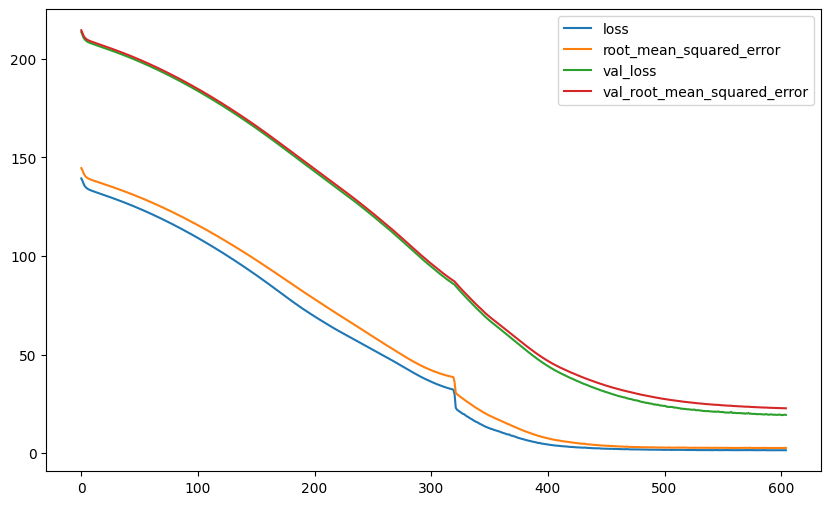

: 

In [22]:
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

n_features = 1

model1 = Sequential()

model1.add(InputLayer((n_input,n_features)))
model1.add(LSTM(100, return_sequences = True))     
model1.add(LSTM(100, return_sequences = True))
model1.add(LSTM(50))
model1.add(Dense(8, activation = 'relu'))
model1.add(Dense(1, activation = 'linear'))

model1.summary()

early_stop = EarlyStopping(monitor = 'val_loss', patience = 4)

from tensorflow.keras.losses import Huber

model1.compile(loss=Huber(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])


model1.fit(train_X, train_y, 
           validation_data = (Val_X, val_y), 
           epochs = 50000, 
           callbacks = [early_stop])

losses_df1 = pd.DataFrame(model1.history.history)

losses_df1.plot(figsize = (10,6))

### Future Predictions

In [20]:
def futureForecast(df, col, n_input, n_features, forecast_timeperiod, model):

    x_input = np.array(df[len(df)-n_input:][col])

    stock_input=list(x_input)

    lst_output=[]
    i=0

    while(i < forecast_timeperiod):

        if(len(stock_input) > n_input):

            x_input = np.array(stock_input[1:])
            x_input = x_input.reshape((1, n_input, n_features))
            yhat = model.predict(x_input, verbose=0)
            stock_input.append(yhat[0][0])
            stock_input = stock_input[1:]
            lst_output.append(yhat[0][0])

            i=i+1

        else:
            x_input = x_input.reshape((1, n_input, n_features))
            yhat = model.predict(x_input, verbose=0)
            #print(yhat[0])
            stock_input.append(yhat[0][0])
            lst_output.append(yhat[0][0])

            i=i+1
            
    return lst_output

n_features = 1
forecast_timeperiod = 10         # next 10 days as 24hrs 
model = model1

forecast_output = futureForecast(historical_data, 
                                 'close', 
                                 n_input, 
                                 n_features, 
                                 forecast_timeperiod, 
                                 model)

print (forecast_output)


[196.29666, 196.08745, 195.80489, 195.51881, 195.24403, 194.95074, 194.54329, 193.9052, 193.0104, 192.42197]


Text(0, 0.5, 'Stock Price')

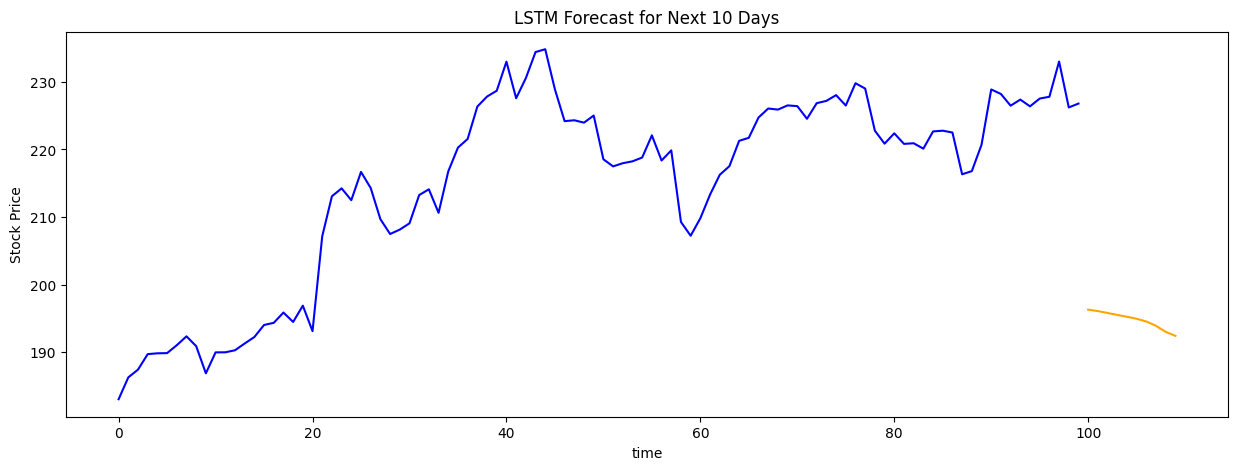

In [21]:
last_10_days = historical_data['close'][len(historical_data) - 20:].tolist()

next_10_days = pd.DataFrame(forecast_output, columns = ['FutureForecast'])

plt.figure(figsize = (15,5))

hist_axis = len(last_10_days)
forecast_axis = hist_axis + len(next_10_days)

plt.plot(np.arange(0,hist_axis),last_10_days, color = 'blue')
plt.plot(np.arange(hist_axis,forecast_axis),next_10_days['FutureForecast'].tolist(), color = 'orange')

plt.title('LSTM Forecast for Next 10 Days')
plt.xlabel('time')
plt.ylabel('Stock Price')

#plt.savefig('Pics_Models/lstm_univariate_forecast_pic1.png')